<a href="https://colab.research.google.com/github/shatakshii25/Machine-Learning-Projects/blob/main/Hyperparameter_Tuning_On_MLP_Using_Grid_SearchCV_And_Random_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Applying Grid SearchCV-**

**Importing Libraries:**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
%matplotlib inline

**Loading the Dataset:**

In [3]:
df = pd.read_csv('/content/adult.csv')

In [4]:
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    32561 non-null  int64 
 1   col2    32561 non-null  object
 2   col3    32561 non-null  int64 
 3   col4    32561 non-null  object
 4   col5    32561 non-null  int64 
 5   col6    32561 non-null  object
 6   col7    32561 non-null  object
 7   col8    32561 non-null  object
 8   col9    32561 non-null  object
 9   col10   32561 non-null  object
 10  col11   32561 non-null  int64 
 11  col12   32561 non-null  int64 
 12  col13   32561 non-null  int64 
 13  col14   32561 non-null  object
 14  col15   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.tail()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.describe()

,col1,col3,col5,col11,col12,col13
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.shape

(32561, 15)

**Label Encoding:**

In [10]:
l = LabelEncoder()

In [11]:
#converting strings into categorical variables
columns=["col1","col2","col4","col6","col7","col8","col9","col10","col14","col15"]
for i in columns:
    df[i]=l.fit_transform(df[i].astype(str))
    label_to_id_dict = {v:i for i,v in enumerate(np.unique(df[i]))}
    df[i]=[label_to_id_dict[x] for x in df[i]]

In [12]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,22,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,33,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,21,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,36,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,11,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


**Handling missing/null values:**

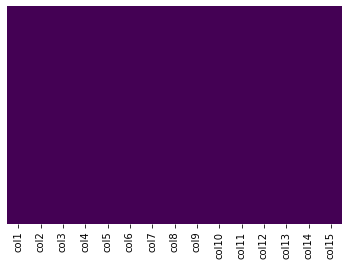

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#No missing values

In [14]:
df1 = df.dropna()

In [15]:
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,22,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,33,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,21,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,36,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,11,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


**Splitting the dataset into training and testing data:**

In [16]:
X=df1.drop('col15',axis=1)
y=df1['col15']

In [17]:
# 70% training data and 30% testing data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=7)

**Training and Testing:**

In [18]:
model=MLPClassifier(max_iter=500,activation='relu')

In [19]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [20]:
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [21]:
results = search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [22]:
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.741
Config: {'max_iter': 1}


**Maximum accuracy of 74.1% at 1 iteration**

In [23]:
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.741 with: {'max_iter': 1}
>0.667 with: {'max_iter': 10}
>0.726 with: {'max_iter': 100}
>0.628 with: {'max_iter': 1000}
>0.646 with: {'max_iter': 10000}


**The accuracy initially decreases until 10 iterations then increases and then gradually decreases by the 10000th iteration**

In [24]:
predictions=search.predict(X_test)

In [25]:
accuracy_score(y_test, predictions)

0.6734568533114955

**Accuracy obtained here is 67.34%**

**Applying Random Search-**

In [26]:
import matplotlib.pyplot as plt

**Hyperparameter Optimization**

In [28]:
mlp_optimized = MLPClassifier()

search_params = {
    "tol": [0.00001],
    "activation": ['identity', 'tanh', 'relu'],
    "learning_rate": ['constant', 'adaptive'],
    "solver": ['lbfgs', 'sgd', 'adam']
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
clf_random = RandomizedSearchCV(mlp_optimized, search_params, verbose=2, n_jobs=-1)

In [30]:
clf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'tanh',
                                                       'relu'],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam'],
                                        'tol': [1e-05]},
                   verbose=2)

In [31]:
from sklearn.metrics import accuracy_score
y_pred_random = clf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"The accuracy score for best classifer through Random search is: {accuracy_random}")

The accuracy score for best classifer through Random search is: 0.7828846350701197


In [32]:
print(f"Best hyperparameters using random search are: {clf_random.best_params_}")

Best hyperparameters using random search are: {'tol': 1e-05, 'solver': 'adam', 'learning_rate': 'adaptive', 'activation': 'identity'}


**Conclusion:**
We can see that we get better accuracy for RandomSearch (accuracy: 78.288%) than GridSearchCV (accuarcy: 67.345%)